**Installation of geopandas**

In [2]:
!pip install geopandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 8.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 8.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 8.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


**Adding Vector Data**

In [4]:
municipality = gpd.read_file('/Users/alexandrabourgeat/Documents/repos/Alexandra-eng.github.io/projects/Data/municipality.shp')

In [5]:
municipality_geojson = gpd.read_file('/Users/alexandrabourgeat/Documents/repos/Alexandra-eng.github.io/projects/Data/municipality.geojson')

**Reading Meta Data**

In [ ]:
print(len(municipality)) # displays length of the file

775


In [ ]:
municipality.head() # print first few lines of the file 

,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry
0,1,Province No 1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,Province No 1,TAPLEJUNG,Maiwakhola,Gaunpalika,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,Province No 1,TAPLEJUNG,Meringden,Gaunpalika,"POLYGON ((87.51233 27.56818, 87.51196 27.56768..."
3,1,Province No 1,TAPLEJUNG,Mikwakhola,Gaunpalika,"POLYGON ((87.6662 27.73004, 87.66659 27.73, 87..."
4,1,Province No 1,TAPLEJUNG,Phaktanglung,Gaunpalika,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."


In [ ]:
municipality.geom_type # geometric shape of data

0      Polygon
1      Polygon
2      Polygon
3      Polygon
4      Polygon
        ...   
770    Polygon
771    Polygon
772    Polygon
773    Polygon
774    Polygon
Length: 775, dtype: object

In [ ]:
municipality.shape # size/structure of data

(775, 6)

In [ ]:
municipality.crs #coordinates reference system

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
type(municipality) #kind of python obj

geopandas.geodataframe.GeoDataFrame

**Map Visualization**

<Axes: >

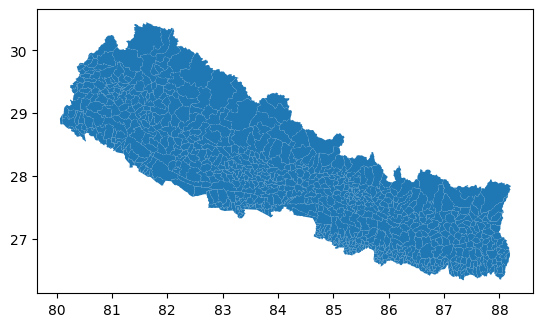

In [ ]:
municipality.plot() 

<Axes: >

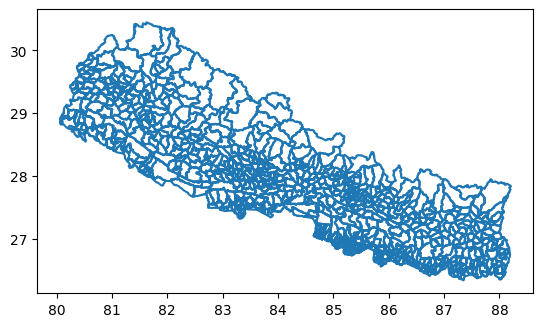

In [15]:
municipality.boundary.plot()

<Axes: >

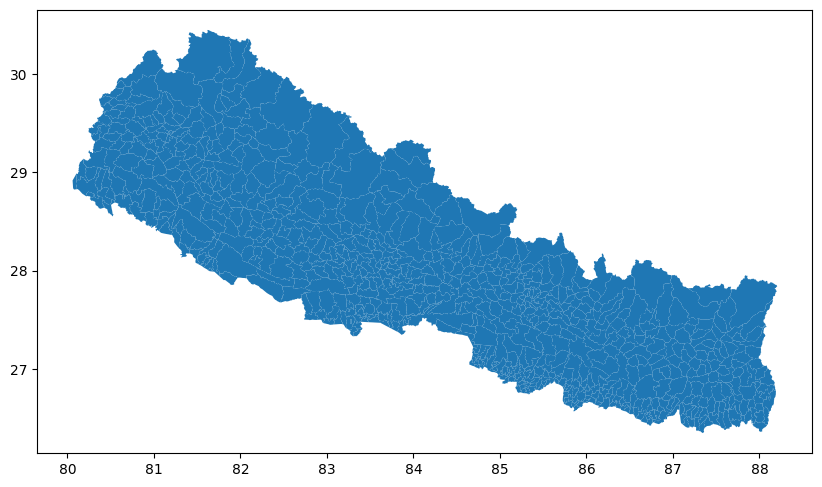

In [16]:
municipality.plot(figsize=(10,10))

<Axes: >

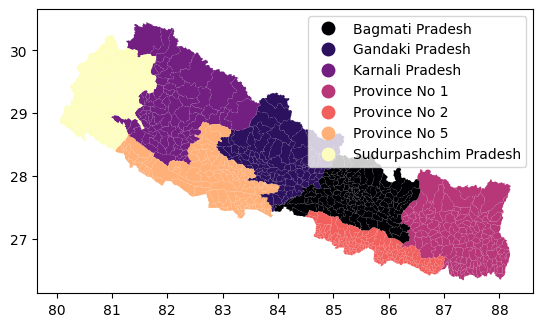

In [18]:
municipality.plot("PR_NAME", cmap = 'magma', legend=True)

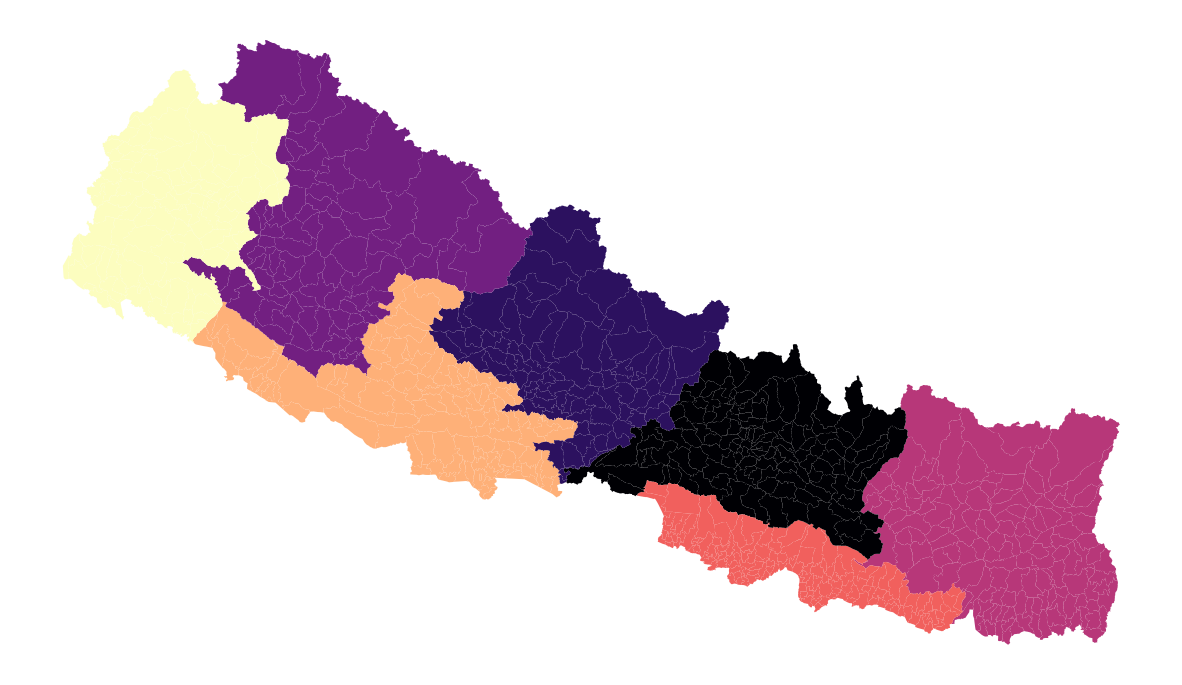

In [ ]:
ax=municipality.plot("PR_NAME", cmap='magma', figsize=(15,15))
ax.set_axis_off() #removing axes

**Writing Data**

In [21]:
abc=gpd.read_file('/Users/alexandrabourgeat/Documents/repos/Alexandra-eng.github.io/projects/Data/municipality.shp')

In [ ]:
abc.to_file('/Users/alexandrabourgeat/Documents/repos/Alexandra-eng.github.io/projects/Output/copy_municipality.shp')
#writes geodataframe to disk as shapefile

**Working Attribute**

<Axes: >

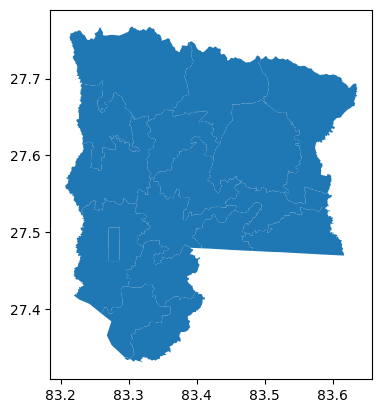

In [23]:
rupandehi = municipality[municipality['DISTRICT']=='RUPANDEHI']
rupandehi.plot()

In [ ]:
municipality1=gpd.read_file('/Users/alexandrabourgeat/Documents/repos/Alexandra-eng.github.io/projects/Output/copy_municipality.shp')

municipality1['area']=0
municipality1.head() #adding area column

,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry,area
0,1,Province No 1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,"POLYGON ((87.60985 27.37043, 87.61107 27.36943...",0
1,1,Province No 1,TAPLEJUNG,Maiwakhola,Gaunpalika,"POLYGON ((87.50402 27.42901, 87.50672 27.42831...",0
2,1,Province No 1,TAPLEJUNG,Meringden,Gaunpalika,"POLYGON ((87.51233 27.56818, 87.51196 27.56768...",0
3,1,Province No 1,TAPLEJUNG,Mikwakhola,Gaunpalika,"POLYGON ((87.6662 27.73004, 87.66659 27.73, 87...",0
4,1,Province No 1,TAPLEJUNG,Phaktanglung,Gaunpalika,"POLYGON ((87.83673 27.95137, 87.83735 27.95119...",0


In [29]:
municipality_crs = municipality1.to_crs(epsg=32645)
municipality_crs['area'] = municipality_crs.geometry.area / 10**6 #calculates the area of each municipality and store in square kilometers
municipality_crs.head()

,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry,area
0,1,Province No 1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,"POLYGON ((560307.153 3027612.864, 560428.32 30...",88.521700
1,1,Province No 1,TAPLEJUNG,Maiwakhola,Gaunpalika,"POLYGON ((549815.446 3034054.303, 550082.592 3...",137.371061
2,1,Province No 1,TAPLEJUNG,Meringden,Gaunpalika,"POLYGON ((550573.02 3049473.152, 550537.274 30...",209.626709
3,1,Province No 1,TAPLEJUNG,Mikwakhola,Gaunpalika,"POLYGON ((565665.744 3067475.242, 565704.431 3...",441.435863
4,1,Province No 1,TAPLEJUNG,Phaktanglung,Gaunpalika,"POLYGON ((582308.234 3092096.983, 582369.345 3...",1851.420797


<Axes: >

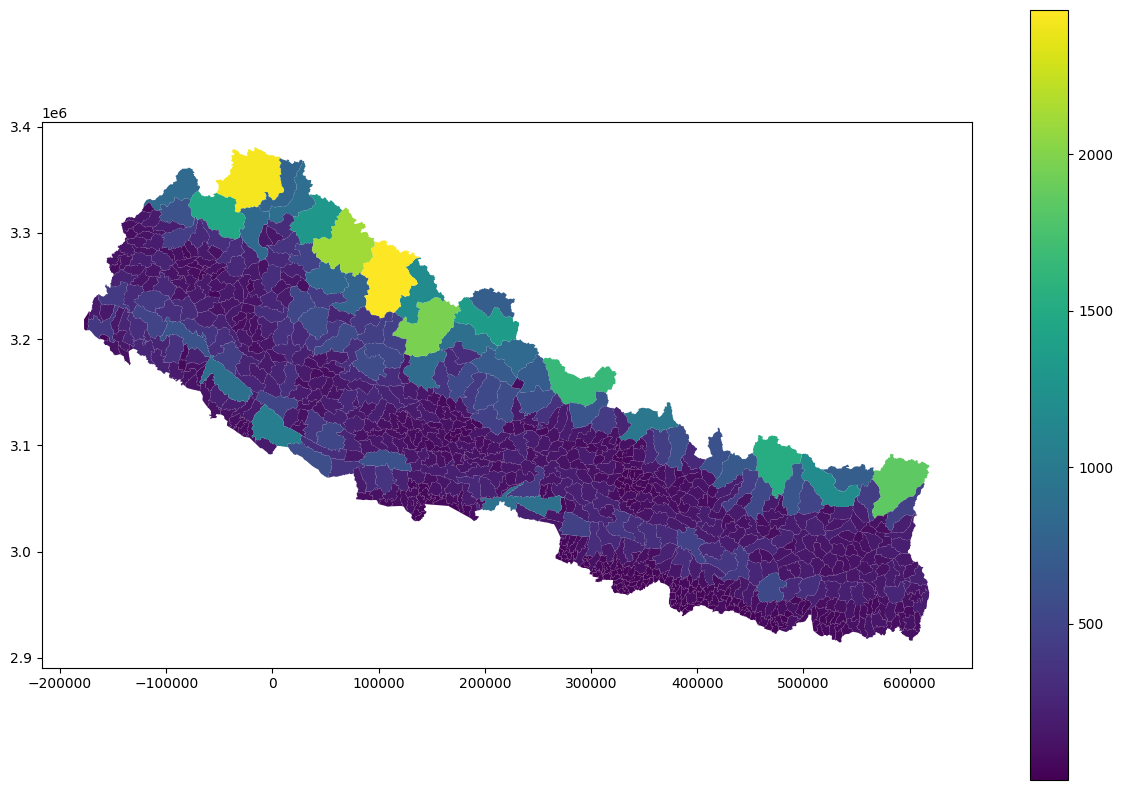

In [34]:
municipality_crs.plot('area', legend=True, figsize=(15, 10))